In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Sample Time Series Data (You can replace this with actual hotel data)
data = {
    'Date': pd.date_range(start='2024-08-15', periods=730, freq='D'),
    'Occupancy_Rate': np.random.randint(50, 100, size=730)
}

In [3]:
# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

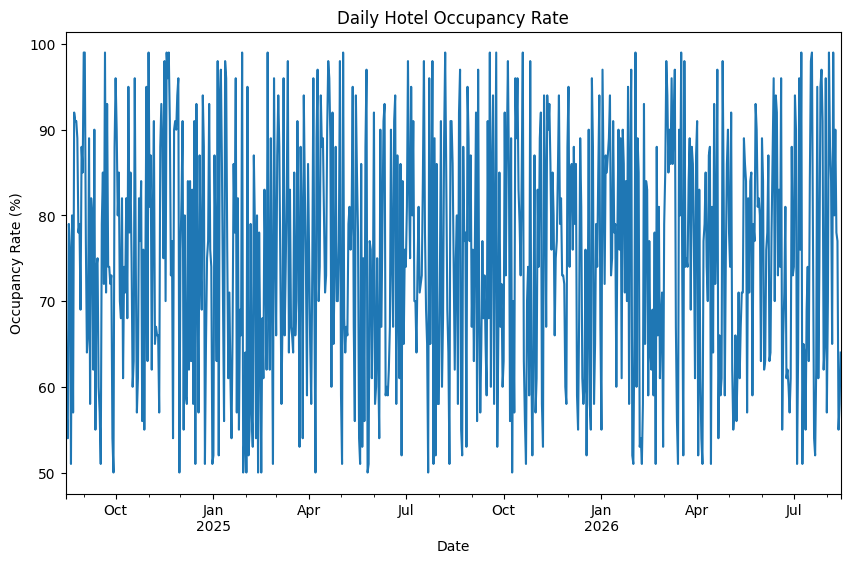

In [4]:
# Plot the Occupancy Rate
df['Occupancy_Rate'].plot(figsize=(10, 6))
plt.title('Daily Hotel Occupancy Rate')
plt.ylabel('Occupancy Rate (%)')
plt.show()

In [5]:
# Decompose the Time Series
decomposition = seasonal_decompose(df['Occupancy_Rate'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

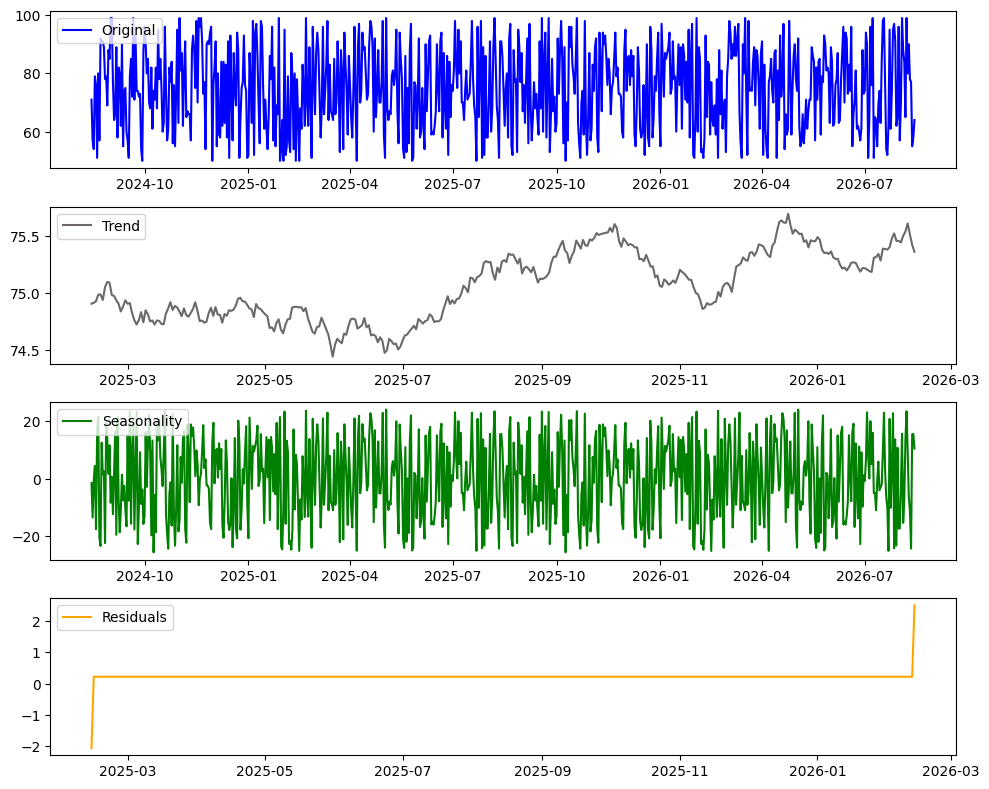

In [6]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Occupancy_Rate'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='#6D6968')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [7]:
# ARIMA Model for Forecasting
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [8]:
# Fit ARIMA Model
model = ARIMA(train['Occupancy_Rate'], order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

c:\Users\Uncle B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Uncle B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Uncle B\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
# Make Predictions
predictions = model_fit.forecast(steps=len(test))

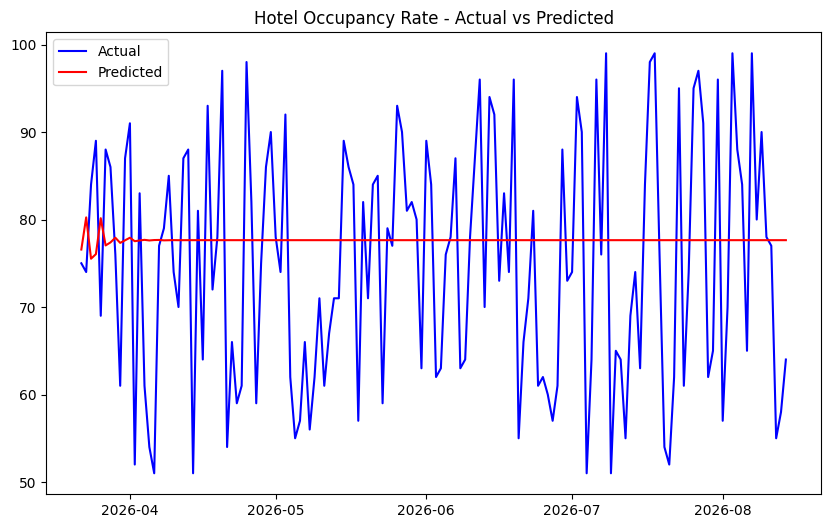

In [10]:
# Plot predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Occupancy_Rate'], label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Hotel Occupancy Rate - Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['Occupancy_Rate'], predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 195.17
